In [40]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [41]:
path='/home/pdirmeye/classes/clim680_2022/CLIM_INDICES/'
file='nao.data'
index_name='nao'

df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,
                 na_values=['-99.9','-99.90'])
df.drop(df.tail(3).index,inplace=True)

In [42]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-01'

In [43]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=876, freq='MS')

In [44]:
clim_index=df.T.unstack().values
clim_index=clim_index.astype('float32')

In [45]:
ds_index=xr.DataArray(clim_index, coords={'time':dates}, dims=['time'])        
ds_index=ds_index.to_dataset(name='nao')
ds_index

<xarray.Dataset>
Dimensions:  (time: 876)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Data variables:
    nao      (time) float32 nan nan nan nan nan nan ... 0.03 1.11 nan nan nan

In [46]:
ds_index_g = ds_index.groupby('time.season').groups

In [47]:
ds_index_D = ds_index_g['MAM']

In [48]:
ds_index_MAM = ds_index.isel(time=ds_index_D)
ds_index_MAM

<xarray.Dataset>
Dimensions:  (time: 219)
Coordinates:
  * time     (time) datetime64[ns] 1948-03-01 1948-04-01 ... 2020-05-01
Data variables:
    nao      (time) float32 nan nan nan nan nan ... 0.36 -2.38 0.66 -1.26 -0.33

In [49]:
dg_index_MAM = ds_index_MAM.groupby('time.year').mean()

In [50]:
file_era5 = '/home/dgray24/ea_moda_fc_mtpr.nc'
ds = xr.open_dataset(file_era5)
ds

<xarray.Dataset>
Dimensions:    (longitude: 1280, latitude: 523, time: 504)
Coordinates:
  * longitude  (longitude) float32 -168.8 -168.5 -168.2 ... 190.4 190.7 191.0
  * latitude   (latitude) float32 87.26 86.98 86.7 ... -58.88 -59.16 -59.44
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01
Data variables:
    mtpr       (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    history:      Wed Nov 02 10:49:36 2022: cdo -z zip_1 select,name=mtpr ea_...
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [51]:
SlicedData = ds.sel(latitude=slice(40,36),
                longitude=slice(-84,-74))

ds_era5 = SlicedData.sel(time=slice('1980-01-01','2009-12-31'))
ds_era5

<xarray.Dataset>
Dimensions:    (longitude: 35, latitude: 14, time: 360)
Coordinates:
  * longitude  (longitude) float32 -83.81 -83.53 -83.25 ... -74.81 -74.53 -74.25
  * latitude   (latitude) float32 39.77 39.48 39.2 38.92 ... 36.67 36.39 36.11
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2009-12-01
Data variables:
    mtpr       (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    history:      Wed Nov 02 10:49:36 2022: cdo -z zip_1 select,name=mtpr ea_...
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [52]:
ds_era5 = ds_era5 * 86400
ds_era5

<xarray.Dataset>
Dimensions:    (longitude: 35, latitude: 14, time: 360)
Coordinates:
  * longitude  (longitude) float32 -83.81 -83.53 -83.25 ... -74.81 -74.53 -74.25
  * latitude   (latitude) float32 39.77 39.48 39.2 38.92 ... 36.67 36.39 36.11
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2009-12-01
Data variables:
    mtpr       (time, latitude, longitude) float64 1.502 1.502 ... 5.786 6.254
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    history:      Wed Nov 02 10:49:36 2022: cdo -z zip_1 select,name=mtpr ea_...
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [53]:
dg = ds_era5.groupby('time.season').groups

In [54]:
dg_M = dg['MAM']

In [55]:
ds_MAM = ds_era5.isel(time=dg_M)
ds_MAM

<xarray.Dataset>
Dimensions:    (longitude: 35, latitude: 14, time: 90)
Coordinates:
  * longitude  (longitude) float32 -83.81 -83.53 -83.25 ... -74.81 -74.53 -74.25
  * latitude   (latitude) float32 39.77 39.48 39.2 38.92 ... 36.67 36.39 36.11
  * time       (time) datetime64[ns] 1980-03-01 1980-04-01 ... 2009-05-01
Data variables:
    mtpr       (time, latitude, longitude) float64 5.196 5.196 ... 2.608 2.858
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    history:      Wed Nov 02 10:49:36 2022: cdo -z zip_1 select,name=mtpr ea_...
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [56]:
dg_MAM = ds_MAM.mtpr.groupby('time.year').mean()

In [57]:
da_climo = dg_MAM.mean()
da_anoms = dg_MAM-da_climo
da_anoms

<xarray.DataArray 'mtpr' (year: 30, latitude: 14, longitude: 35)>
array([[[ 0.25223759,  0.25223759,  0.22305516, ...,  0.46853093,
          0.80327061,  1.16890935],
        [ 0.17670659,  0.17670659, -0.04387828, ...,  0.60671834,
          0.801554  ,  2.07184819],
        [ 0.03508595,  0.03508595, -0.11940929, ...,  0.37926701,
          1.3757613 ,  1.46073369],
        ...,
        [ 1.21611622,  1.21611622,  1.60664586, ..., -0.43011638,
         -0.43011638, -0.096235  ],
        [ 1.31911305,  1.31911305,  1.41009358, ..., -0.21296474,
         -0.21296474, -0.13400051],
        [ 0.53204564,  0.53204564,  0.50543812, ..., -0.18549892,
         -0.18549892,  0.01362828]],

       [[ 0.13207463,  0.13207463, -0.01555416, ..., -0.77858898,
         -0.66872569, -0.78459712],
        [ 0.27884511,  0.27884511, -0.20094844, ..., -0.55113765,
         -0.56057903, -0.4455659 ],
        [ 0.41617421,  0.41617421,  0.26940373, ..., -0.73395702,
         -0.45844051, -0.79318019],
...
        [ 0.04796055,  0.04796055,  0.25223759, ..., -0.53740474,
         -0.53740474, -0.62838527],
        [-0.13829204, -0.13829204,  0.10117558, ..., -0.73996517,
         -0.73996517, -0.6944749 ],
        [-0.67473384, -0.67473384, -0.81034633, ..., -0.29278728,
         -0.29278728, -0.60177776]],

       [[-0.29021236, -0.29021236, -0.22498104, ..., -0.43011638,
         -0.38548442, -0.49878093],
        [-0.4575822 , -0.4575822 , -0.56143733, ..., -0.02327892,
         -0.27905437,  0.25652913],
        [-0.27476283, -0.27476283, -0.0713441 , ...,  0.25052098,
          0.61615971,  0.52947072],
        ...,
        [ 1.24701527,  1.24701527,  0.89854268, ..., -0.07992717,
         -0.07992717,  0.19988087],
        [ 0.94832448,  0.94832448,  0.69598225, ...,  0.00247029,
          0.00247029,  0.28485325],
        [-0.31767818, -0.31767818, -0.33055278, ...,  0.18528966,
          0.18528966,  0.85734395]]])
Coordinates:
  * longitude  (longitude) float32 -83.81 -83.53 -83.25 ... -74.81 -74.53 -74.25
  * latitude   (latitude) float32 39.77 39.48 39.2 38.92 ... 36.67 36.39 36.11
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2006 2007 2008 2009

In [58]:
dg_index_MAM = dg_index_MAM.sel(year=slice(da_anoms['year'][0],da_anoms['year'][-1]))
dg_index_MAM

<xarray.Dataset>
Dimensions:  (year: 30)
Coordinates:
  * year     (year) int64 1980 1981 1982 1983 1984 ... 2005 2006 2007 2008 2009
Data variables:
    nao      (year) float32 -0.27 -0.3867 0.1067 -0.1633 ... 0.6033 -1.06 0.48

In [59]:
from scipy.stats import linregress

In [60]:
nx = len(da_anoms['longitude'])
ny = len(da_anoms['latitude'])

p_array = np.zeros((ny,nx))
r_array = np.zeros((ny,nx))
m_array = np.zeros((ny,nx))

x =       dg_index_MAM['nao']

for j in range(ny):
    print(f"{j},",end=" ")
    for i in range(nx):
        
        y = da_anoms[:,j,i]
        
        m,b,r,p,e = linregress(x,y)
        
        m_array[j,i] = m
        r_array[j,i] = r
        p_array[j,i] = p
print("*** DONE ***")

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, *** DONE ***


In [61]:
mask_sig = np.where(p_array<0.05,m_array,np.nan)

/home/dgray24/.conda/envs/clim_data3/lib/python3.10/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/dgray24/.conda/envs/clim_data3/lib/python3.10/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/dgray24/.conda/envs/clim_data3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


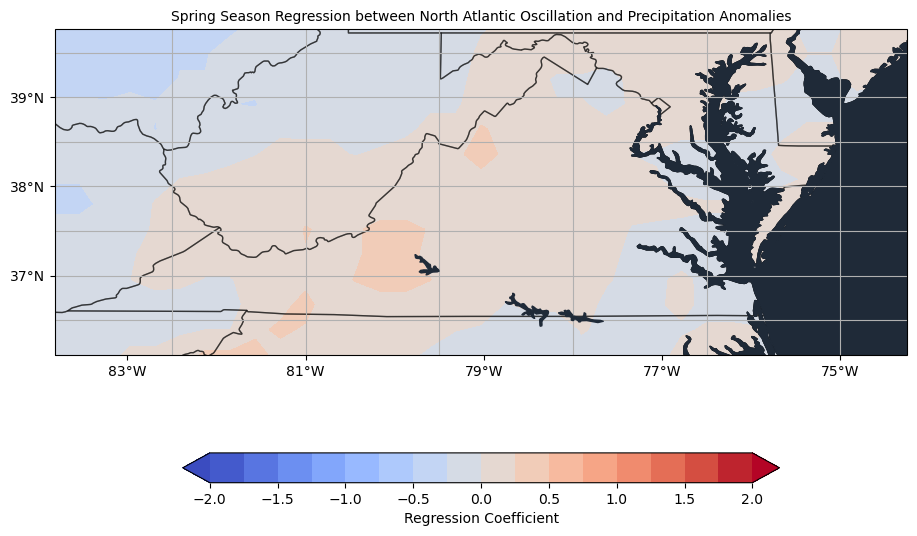

In [62]:
clevs=np.arange(-2,2.25,0.25)

fig = plt.figure(figsize=(11,8.5))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-78))

data = m_array
mask_data,lons = (mask_sig,da_anoms['longitude'])
cs = ax.contourf(da_anoms['longitude'],da_anoms['latitude'],data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='coolwarm',extend='both')

ax.contourf(da_anoms['longitude'],da_anoms['latitude'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['..','..'],extend='both',alpha=0)

ax.set_xticks([-83,-81,-79,-77,-75],crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks([37,38,39],crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.coastlines()
ax.gridlines()
ax.add_feature(feature.OCEAN, zorder=2, color='#1F2A38')
ax.add_feature(feature.BORDERS, zorder=2, color='k')
ax.add_feature(feature.LAKES, zorder=3, color='#1F2A38')
ax.add_feature(feature.STATES.with_scale('10m'),
               linestyle='-', alpha=.5)
        

cbar = plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient')

plt.title('Spring Season Regression between North Atlantic Oscillation and Precipitation Anomalies',fontsize=10) ;

fig.savefig('era5_linreg1.png', bbox_inches='tight')